In [ ]:
import os
import copy
import matplotlib.pyplot as plt
from pycocotools.ytvos import YTVOS
from pycocotools.ytvoseval import YTVOSeval
import numpy as np
import skimage.io as io
import pylab

frame_dir = '/mnt/share172/et21-guopx/codes/DATA/BURST/frames_select/val'
visual_dir = '/mnt/share172/et21-guopx/codes/DATA/BURST/gt_visual'

# load ytbvis GT json
annFile = "/mnt/share172/et21-guopx/codes/DATA/BURST/annotations/val/all_classes_coco.json"
ytvisGT = YTVOS(annFile)

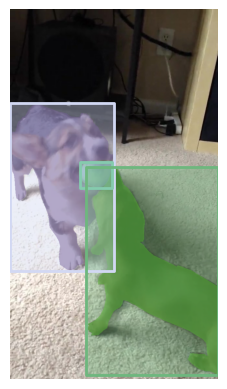

In [6]:
VidIds = ytvisGT.getVidIds()
for this_vid in VidIds:
    AnnoIds_this_vid = ytvisGT.getAnnIds(VidIds[this_vid])
    Ann_this_vid = ytvisGT.loadAnns(AnnoIds_this_vid)
    video = ytvisGT.loadVids(VidIds[this_vid])
    for frame_idx, frame_name in enumerate(video[0]['file_names']):
        frame_path = os.path.join(frame_dir, frame_name)
        I = io.imread(frame_path)
        plt.imshow(I); plt.axis('off')
        Ann_this_frame = copy.deepcopy(Ann_this_vid)
        for a in Ann_this_frame:
            a['segmentations'] = a['segmentations'][frame_idx]
            a['areas'] = a['areas'][frame_idx]
            a['bboxes'] = a['bboxes'][frame_idx]
        Ann_this_frame_filtered = [ins for ins in Ann_this_frame if ins['segmentations'] is not None]
        ytvisGT.showAnns_frame(Ann_this_frame_filtered, draw_bbox=True)

        save_path = os.path.join(visual_dir, frame_name)
        # 提取目录部分
        directory = os.path.dirname(save_path)
        # 自动创建中间目录
        os.makedirs(directory, exist_ok=True)
        plt.savefig(save_path, bbox_inches='tight', pad_inches=0, dpi=360)
        plt.clf()
        print(frame_name)
